In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Import data
VQC_df = pd.read_csv('VQC_runtime_results.csv')
# Add VQC to the dataframe
VQC_df['Algorithm'] = 'VQC'


QSVC_df = pd.read_csv('QSVC_runtime_results.csv')
# Add QSVC to the dataframe
QSVC_df['Algorithm'] = 'QSVC'

# Merge the dataframes
df = pd.concat([VQC_df, QSVC_df])
df.reset_index(inplace=True, drop=True)

In [42]:
NN_df = pd.read_csv('NN_results.csv')
NN_df['Algorithm'] = 'Classical NN'
SVM_df = pd.read_csv('SVM_results.csv')
SVM_df['Algorithm'] = 'Classical SVM'

# Merge the dataframes
classic_df = pd.concat([NN_df, SVM_df])
classic_df.reset_index(inplace=True, drop=True)
classic_df['Device'] = 'Local'


In [15]:
# Create a new dataframe with data seperated by model

# Select the columns for the bar chart
columns = ['Dataset', 'Simulator Accuracy', 'IonQ Accuracy',
           'Quantinuum Accuracy', 'Rigetti Accuracy', 'No-Noise Simulator Accuracy', 'Algorithm']

acc_df = df[columns].copy()
acc_df.rename(columns={'Simulator Accuracy': 'Simulator', 'No-Noise Simulator Accuracy': 'No-Noise Simulator'}, inplace=True)
acc_df = acc_df.melt(id_vars=['Dataset', 'Algorithm'], var_name='Device', value_name='Accuracy')

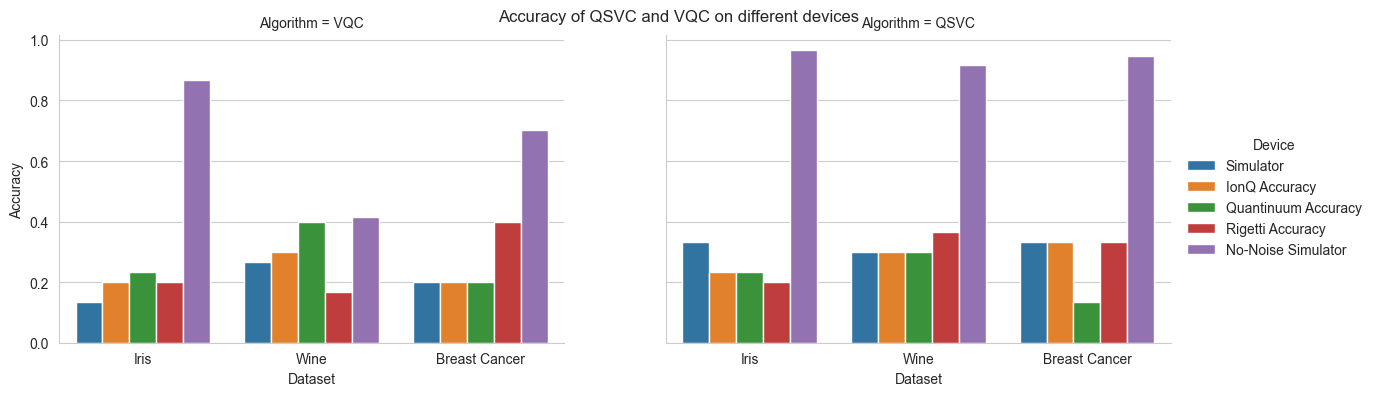

In [16]:
# Plot acc_df

# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.catplot(x='Dataset', y='Accuracy', hue='Device', col='Algorithm', data=acc_df, kind='bar', height=4, aspect=1.5, legend=False)

# Add spacing between the plots
g.fig.subplots_adjust(wspace=0.2)

# Set the title
g.fig.suptitle('Accuracy of QSVC and VQC on different devices')

# Set the legend
g.add_legend(title='Device')

# Set the axes labels
g.set_axis_labels('Dataset', 'Accuracy')

# Save the figure
g.savefig('QSVC_VQC_Accuracy.png')


In [17]:
# Create a new dataframe for CPU and Memory with data seperated by model

# Select the columns for the bar chart
columns = ['Dataset', 'CPU', 'CPU IonQ', 'CPU Quantinuum', 'CPU Rigetti', 'Algorithm']

cpu_df = df[columns].copy()

# rename CPU to Simulator
cpu_df.rename(columns={'CPU': 'Simulator', 'CPU IonQ': 'IonQ', 'CPU Quantinuum': 'Quantinuum', 'CPU Rigetti': 'Rigetti'}, inplace=True)

cpu_df = cpu_df.melt(id_vars=['Dataset', 'Algorithm'], var_name='Device', value_name='CPU')

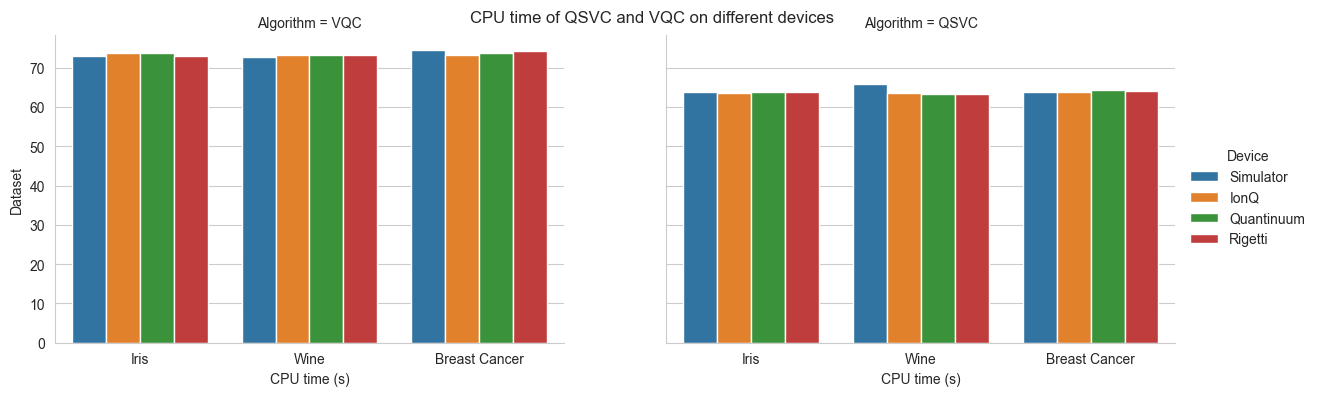

In [18]:
# Plot cpu_df

# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.catplot(x='Dataset', y='CPU', hue='Device', col='Algorithm', data=cpu_df, kind='bar', height=4, aspect=1.5, legend=False)

# Add spacing between the plots
g.fig.subplots_adjust(wspace=0.2)

# Set the title
g.fig.suptitle('CPU time of QSVC and VQC on different devices')

# Set the legend
g.add_legend(title='Device')

# Set the axes labels
g.set_axis_labels('CPU time (s)', 'Dataset')

# Save the figure
g.savefig('QSVC_VQC_CPU.png')


In [19]:
# Create a new dataframe for Noise with data seperated by model

# Select the columns for the bar chart
columns = ['Dataset', 'Simulator Noise', 'IonQ Noise',
           'Quantinuum Noise', 'Rigetti Noise', 'Algorithm']

noise_df = df[columns].copy()

noise_df = noise_df.melt(id_vars=['Dataset', 'Algorithm'], var_name='Device', value_name='Noise')


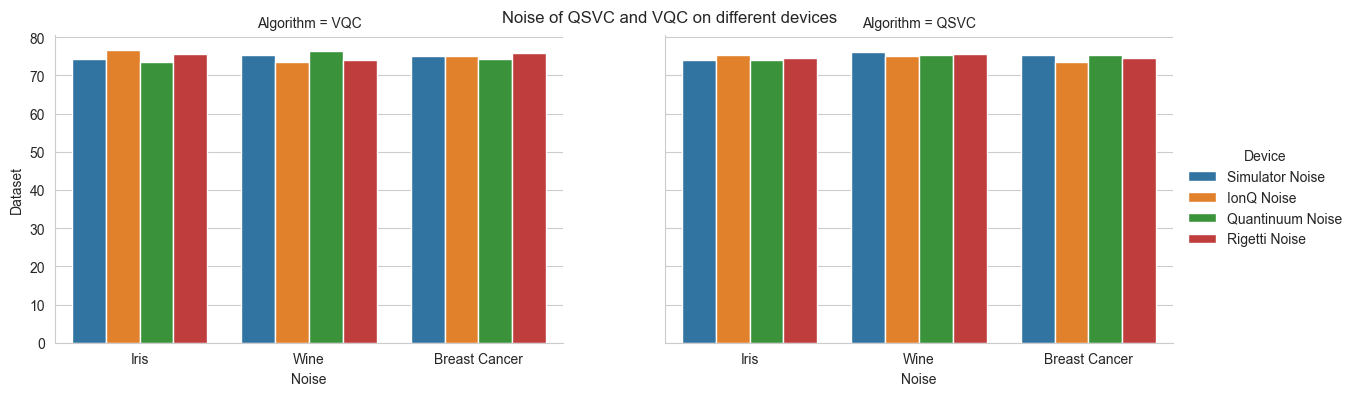

In [20]:
# Plot noise_df

# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.catplot(x='Dataset', y='Noise', hue='Device', col='Algorithm', data=noise_df, kind='bar', height=4, aspect=1.5, legend=False)

# Add spacing between the plots
g.fig.subplots_adjust(wspace=0.2)

# Set the title
g.fig.suptitle('Noise of QSVC and VQC on different devices')

# Set the legend
g.add_legend(title='Device')

# Set the axes labels
g.set_axis_labels('Noise', 'Dataset')

# Save the figure

g.savefig('QSVC_VQC_Noise.png')

In [43]:
# merge comparison_df and acc_df dataframes, drop CPU and Memory
acc_comparison_df = pd.concat([classic_df, acc_df])
acc_comparison_df.reset_index(inplace=True, drop=True)
acc_comparison_df.drop(columns=['CPU', 'Memory'], inplace=True)

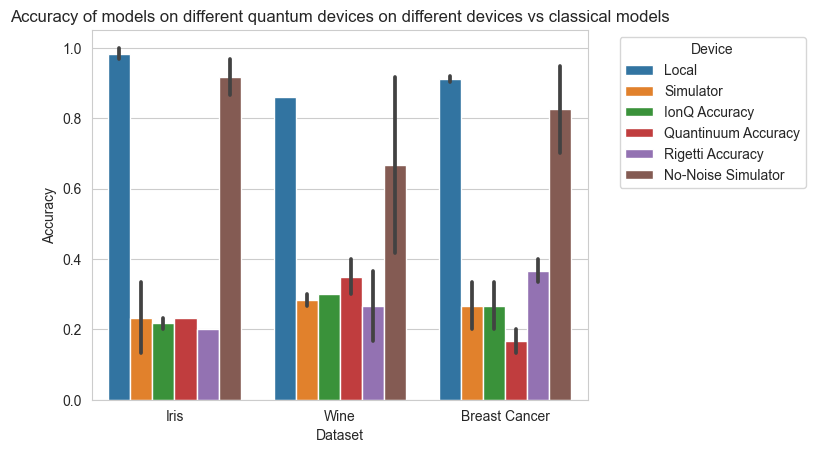

In [44]:
# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.barplot(x='Dataset', y='Accuracy',
                hue='Device', data=acc_comparison_df)

# Set the title
g.set_title(
    'Accuracy of models on different quantum devices on different devices vs classical models')

# Set the legend
g.legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the axes labels
g.set(xlabel='Dataset', ylabel='Accuracy')

# Save the figure
plt.savefig('QSVC_VQC_Classical_Accuracy.png', bbox_inches='tight')


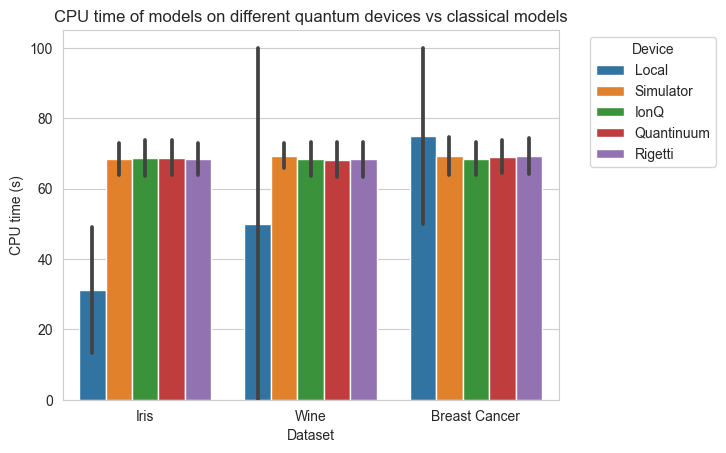

In [45]:
cpu_comparison_df = pd.concat([classic_df, cpu_df])
cpu_comparison_df.reset_index(inplace=True, drop=True)
cpu_comparison_df.drop(columns=['Accuracy', 'Memory'], inplace=True)

# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.barplot(x='Dataset', y='CPU', hue='Device', data=cpu_comparison_df)

# Set the title
g.set_title('CPU time of models on different quantum devices vs classical models')

# Set the legend
g.legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the axes labels
g.set(xlabel='Dataset', ylabel='CPU time (s)')

# Save the figure
plt.savefig('QSVC_VQC_Classical_CPU.png', bbox_inches='tight')

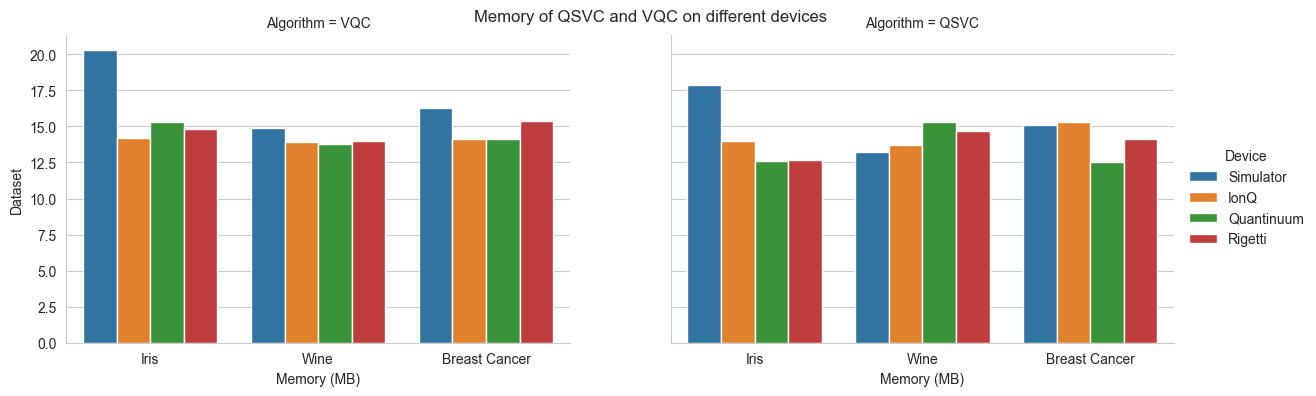

In [46]:
# Create a new dataframe for Memory with data seperated by model

# Select the columns for the bar chart
columns = ['Dataset', 'Memory', 'Memory IonQ', 'Memory Quantinuum', 'Memory Rigetti', 'Algorithm']

memory_df = df[columns].copy()

# rename Memory to Simulator

memory_df.rename(columns={'Memory': 'Simulator', 'Memory IonQ': 'IonQ', 'Memory Quantinuum': 'Quantinuum', 'Memory Rigetti': 'Rigetti'}, inplace=True)

memory_df = memory_df.melt(id_vars=['Dataset', 'Algorithm'], var_name='Device', value_name='Memory')

# Plot memory_df

# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.catplot(x='Dataset', y='Memory', hue='Device', col='Algorithm', data=memory_df, kind='bar', height=4, aspect=1.5, legend=False)

# Add spacing between the plots
g.fig.subplots_adjust(wspace=0.2)

# Set the title

g.fig.suptitle('Memory of QSVC and VQC on different devices')

# Set the legend

g.add_legend(title='Device')

# Set the axes labels

g.set_axis_labels('Memory (MB)', 'Dataset')

# Save the figure

g.savefig('QSVC_VQC_Memory.png')

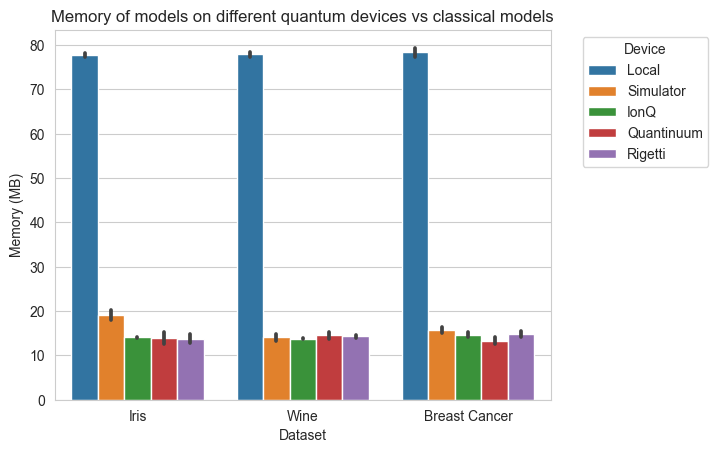

In [47]:
memory_comparison_df = pd.concat([classic_df, memory_df])
memory_comparison_df.reset_index(inplace=True, drop=True)
memory_comparison_df.drop(columns=['Accuracy', 'CPU'], inplace=True)

# Set the style
sns.set_style('whitegrid')

# Create a bar chart
g = sns.barplot(x='Dataset', y='Memory', hue='Device', data=memory_comparison_df)

# Set the title

g.set_title('Memory of models on different quantum devices vs classical models')

# Set the legend

g.legend(title='Device', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the axes labels

g.set(xlabel='Dataset', ylabel='Memory (MB)')

# Save the figure

plt.savefig('QSVC_VQC_Classical_Memory.png', bbox_inches='tight')

